# Сборный проект

Описание проекта: 
У нас есть данные продаж компьютерных игр интернет-магазина «Стримчик» . В данных есть сведения о продажах игр, оценке пользователей и экспертов, жанрах и платформах. 
<br>Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Данные до 2016 года. Мы планируем кампанию на 2017-й. 
<br>Работу по проекту будем проводить следующим образом: <br>Шаг 1. Подготовка данных(замена названий столбцов, преобразование данных в нужные типы, обработка пропусков, проведение расчетов продаж во всех регионах)
<br>Шаг 2. Проведем исследовательский анализ(посмотрим, сколько игр выпускалось в разные годы,посмотрим, как менялись продажи по платформам, определим актуальный период для формирования работы в 2017 году, изучим какие платформы лидируют по продажам, , построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, соотнесем выводы с продажами игр на других платформах, посмотрим на общее распределение игр по жанрам)
<br>Шаг 3. Составим портрет пользователя каждого региона(определим для пользователя каждого региона (NA, EU, JP): самые популярные платформы (топ-5), самые популярные жанры (топ-5), посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе)<br>Шаг 4. Проверим гипотезы(средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные)

Импортируем все необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Откроем файл.

In [2]:
games = pd.read_csv('games.csv')
games

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

Значения в столбцах следющие:
<br>Описание данных
<br>•	**Name** — название игры
<br>•	**Platform** — платформа
<br>•	**Year_of_Release** — год выпуска
<br>•	**Genre** — жанр игры
<br>•	**NA_sales** — продажи в Северной Америке (миллионы проданных копий)
<br>•	**EU_sales** — продажи в Европе (миллионы проданных копий)
<br>•	**JP_sales** — продажи в Японии (миллионы проданных копий)
<br>•	**Other_sales** — продажи в других странах (миллионы проданных копий)
<br>•	**Critic_Score** — оценка критиков (максимум 100)
<br>•	**User_Score** — оценка пользователей (максимум 10)
<br>•	**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг <br>компьютерных игр и присваивает им подходящую возрастную категорию.


## Предобработка данных

### Корректировка названий столбцов

Выведем названия столбцов. И изучим их.

In [3]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Нужно привести названия к нижнему регистру.

In [4]:
games.columns = games.columns.str. lower()

### Приведение данных к верному типу

Посмотрим, какие типы данных в таблице.

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Первый неверный формат это float64 в столбце year_of_release, а также в столбце User_Score — оценка пользователей. Должна быть численной float или int. Будем приводить к должному.

Приведем к верному столбец year_of_release. Он у нас указан в формате float, переведем в int. Предварительно заменив 0 пустые значения. 

Все сработало.

Приведем данные в столбце user_score к должном. Посмотрим на значения столбца.

In [8]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='ignore') 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Все получилось.

### Проверка на дубликаты

Проверим данные на дубликаты. 

In [10]:
games.duplicated().sum()

0

Не обнаружены.

В данных есть нули это видно при изучении данных методом info().

### Работа с пропусками

Проверим данные на пропуски.

In [11]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Значения пропущены в столбцам name,genre,year_of_release, critic_score, user_score, rating. Посмотрим на name.       

In [12]:
games.query('@pd.isna(name)')

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Получается, что это те же строчки, что и пропущенные в жанре genre. Таких строчек всего 2. Очень много пропущенных значений в этих строках, их проще удалить. После удаления проверим нули в выборке. 

In [13]:
games = games[games['genre'].notnull()]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Сritic_score** Посмотрим на значения в этом столбце.

In [14]:
games.query('@pd.isna(critic_score)')

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8576 rows x 11 columns]

8578 строк из 16715. Это практически 33%. Заполнять значения любой характеристикой будь то медиана, среднее рисковано. Можем исказить результаты. 

**User_score** Посмотрим на значения в этом столбце.

In [15]:
games.query('@pd.isna(user_score)')

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6699 rows x 11 columns]

9125 строк. Это 55%, т.е. даже больше половины. Однозначно, оставляем значения в том виде, что есть.

**Rating** Посмотрим на значения в этом столбце.

In [16]:
games.query('@pd.isna(rating)')

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6764 rows x 11 columns]

Пустых значений меньше, чем в user_score,но все же это 40,5%. Вероятность ошибиться при любом заполнении очень высока. Не будем этого делать. 

Пустых значений много. Пользовательские оценки и рейтинг отсутствуют и у игр современных, например 2016 года, и у игр 1985 года, например. Поучается, что отдаты релиза это не зависет. Данные по продажам также как есть, так и нет у таких игр. Отличаются и платформы. Не сказать, что это ошибка при выгрузке одной из них. Как и жанры совершенно различны. Какую-то зависимость от категории игр найти на том этапе не получается. 

In [17]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В задании проекта сказано: Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработатью. Посмотрим, что это за строки.

In [18]:
games.query('user_score == "tbd"') 

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

Оказывается, что таких строк достаточно много 2424. Это около 14,5%. Если мы заменим их нулями, рейтинг будет неверно трактоваться. Результативнее заменить значения на NaN. Сделаем это.Посмотрим, прошла ли замена. 

In [19]:
games['user_score'] = games['user_score'].replace('tbd','NaN')
games['user_score'].value_counts(ascending=False)
games['user_score'] = games['user_score'].astype('float64', errors='ignore')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


TBD = to be determined. Т.е. пустые значения, где не была указана пользовательская оценка заменили на данную аббревиатуру. Наша замена на NaN, так как столбец с числеными значениями полностью обоснована. Заполнять 0 это смещение рассчетов вниз. Заполнение медианным значением или средним в значительной степени исказит картину.

### Расчет суммарных продаж во всех регионах 

Создадим новый столбец total_sales и просуммируем данные по продажам во всех регионах.

In [20]:
games.insert(8, "total_sales", games.na_sales+games.eu_sales+games.jp_sales+games.other_sales)
games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
0         41.36     28.96      3.77         8.45        82.54          76.0   
1         29.08      3.58      6.81         0.77        40.24           NaN   
2         15.68     12.76      3.79         3.29        35.52          82.0   
3         15.61     10.93      3.28         2.95        32.77          80.0   
4         11.27      8.89     10.22         1.00        31.38           NaN   
...         ...       ...       ...          ...          ...           ...   
16710      0.00      0.00      0.01         0.00         0.01           NaN   
16711      0.00      0.01      0.00         0.00         0.01           NaN   
16712      0.00      0.00      0.01         0.00         0.01           NaN   
16713      0.01      0.00      0.00         0.00         0.01           NaN   
16714      0.00      0.00      0.01         0.00         0.01           NaN   

       user_score rating  
0             8.0      E  
1             NaN    NaN  
2             8.3      E  
3             8.0      E  
4             NaN    NaN  
...           ...    ...  
16710         NaN    NaN  
16711         NaN    NaN  
16712         NaN    NaN  
16713         NaN    NaN  
16714         NaN    NaN  

[16713 rows x 12 columns]

### Аномалии в данных

In [21]:
games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16444.000000  16713.000000  16713.000000  16713.000000   
mean       2006.486256      0.263302      0.145045      0.077625   
std           5.875525      0.813565      0.503359      0.308871   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales   total_sales  critic_score   user_score  
count  16713.000000  16713.000000   8137.000000  7590.000000  
mean       0.047343      0.533315     68.967679     7.125046  
std        0.186742      1.548282     13.938165     1.500006  
min        0.000000      0.000000     13.000000     0.000000  
25%        0.000000      0.060000     60.000000     6.400000  
50%        0.010000      0.170000     71.000000     7.500000  
75%        0.030000      0.470000     79.000000     8.200000  
max       10.570000     82.540000     98.000000     9.700000

По некоторым названием игр, конечно, можно предположить год релиза. Например: Madden NFL 2004, наверняка это 2004 год. Но это размышления. Не факт, что это так. Для таких названий, как например, Freaky Flyers,вряд ли получится это сделать.<br> Всего у нас 269 таких строк из 16713. Это 1,6% лучше удалить эти данные.<br> Проверим удаление выводом describe по обновленным данным.

In [22]:
games = games[games['year_of_release']!=0]
games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16444.000000  16713.000000  16713.000000  16713.000000   
mean       2006.486256      0.263302      0.145045      0.077625   
std           5.875525      0.813565      0.503359      0.308871   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales   total_sales  critic_score   user_score  
count  16713.000000  16713.000000   8137.000000  7590.000000  
mean       0.047343      0.533315     68.967679     7.125046  
std        0.186742      1.548282     13.938165     1.500006  
min        0.000000      0.000000     13.000000     0.000000  
25%        0.000000      0.060000     60.000000     6.400000  
50%        0.010000      0.170000     71.000000     7.500000  
75%        0.030000      0.470000     79.000000     8.200000  
max       10.570000     82.540000     98.000000     9.700000

Построим гистограммы и изуим распределения.

year_of_release


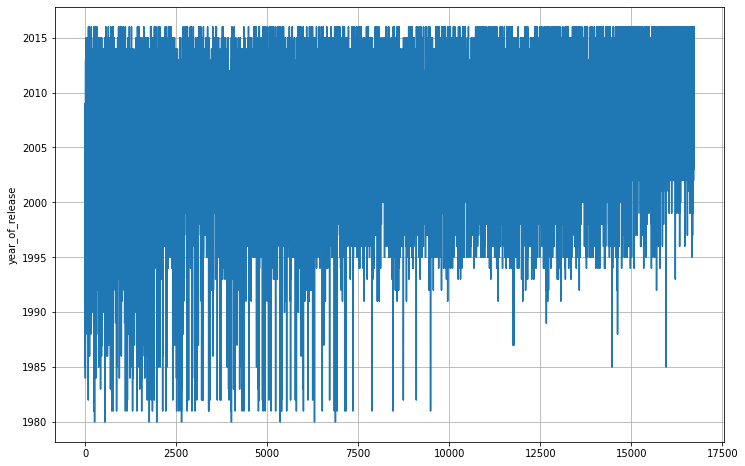

na_sales


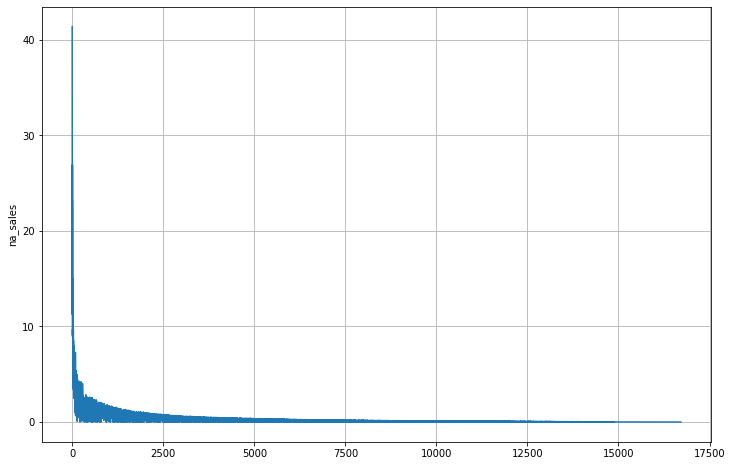

eu_sales


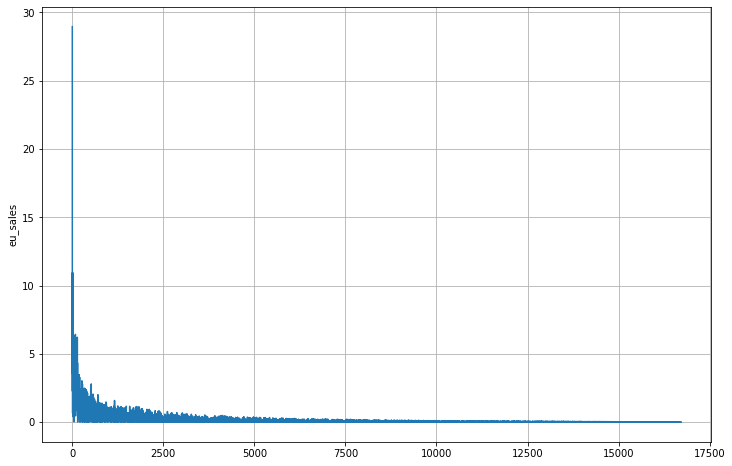

jp_sales


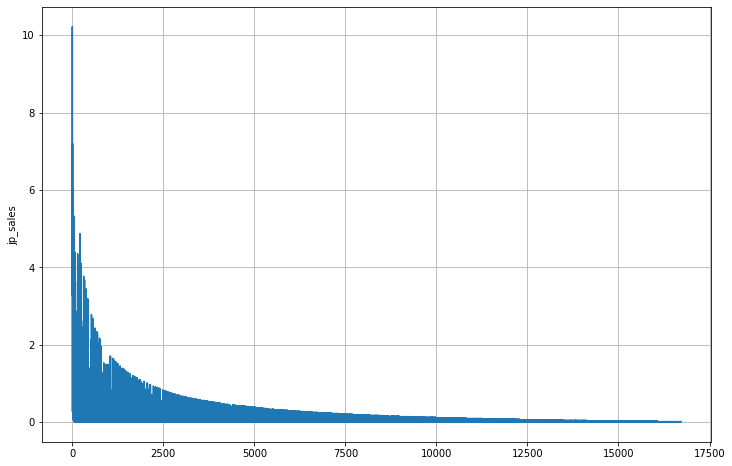

other_sales


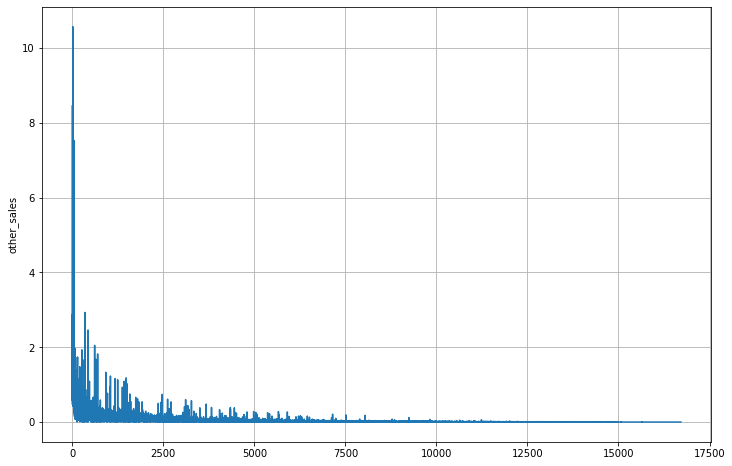

total_sales


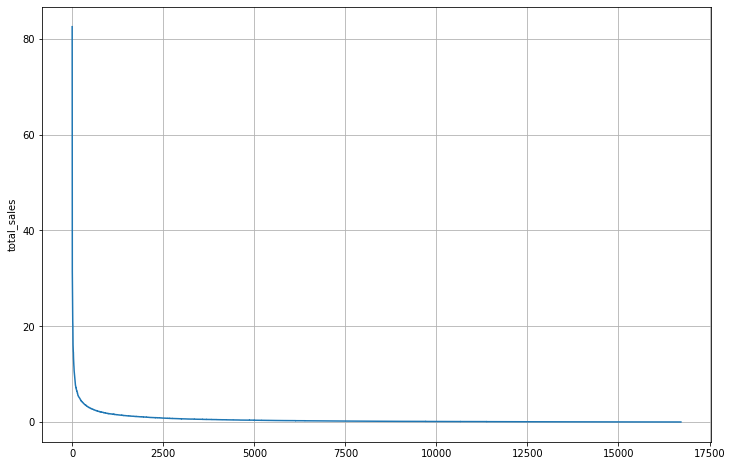

critic_score


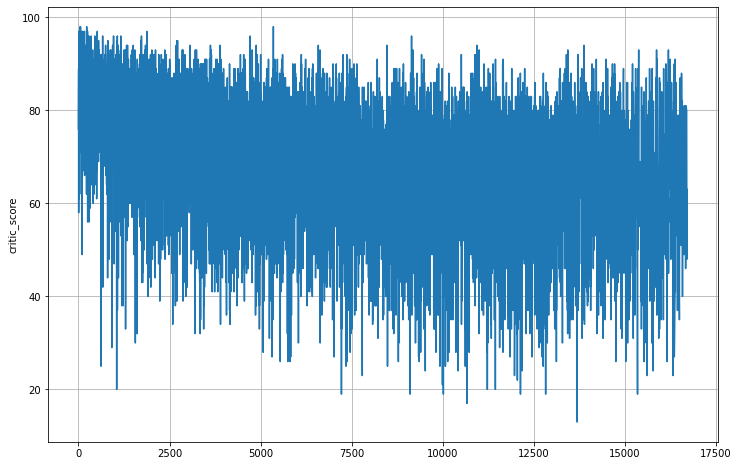

user_score


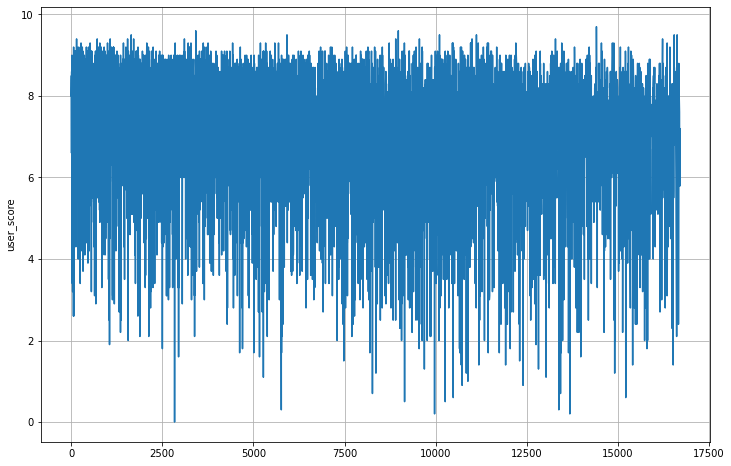

In [23]:
columns =['year_of_release','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score']
for column in columns:
    print(column)
    plt.figure(figsize=(12,8))
    sns.lineplot(data=games[column])
    plt.grid()
    plt.show()

В распределениях есть разброс значений, но каких-то серьезных проблем нет.

In [25]:
games['rating'] = games['rating'].fillna(0)

## Исследовательский анализ данных

### Расчет кол-ва выпущенных игр по годам

Будем работать только со столбцами name, platform, year_of_release и total_sales.

In [26]:
games_stat = games[['name','platform','year_of_release','total_sales']]
games_stat.head()

name platform  year_of_release  total_sales
0                Wii Sports      Wii           2006.0        82.54
1         Super Mario Bros.      NES           1985.0        40.24
2            Mario Kart Wii      Wii           2008.0        35.52
3         Wii Sports Resort      Wii           2009.0        32.77
4  Pokemon Red/Pokemon Blue       GB           1996.0        31.38

Посчитаем сколько игр выпускалось в разные годы.

In [27]:
games_by_years = games_stat.groupby('year_of_release')['name'].count().reset_index()
games_by_years.columns= ['year_of_release','games_by_year,PCS']

Построим график зависимости числа игр от года.

<AxesSubplot:xlabel='year_of_release', ylabel='games_by_year,PCS'>

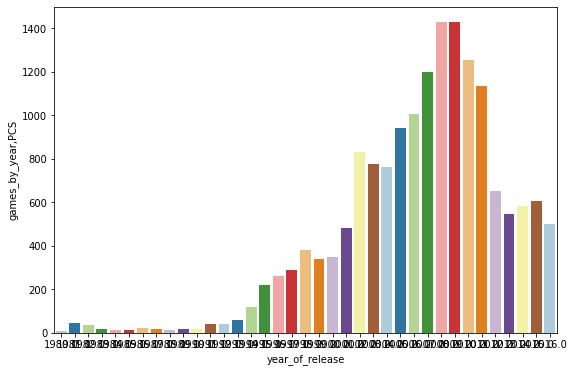

In [28]:
plt.figure(figsize=(9,6))
sns.barplot(data=games_by_years, x='year_of_release' ,y='games_by_year,PCS', palette="Paired")

До 2000х гдов наблюдается хвост малым кол-вом выпускаемых игр.

<AxesSubplot:xlabel='year_of_release', ylabel='games_by_year,PCS'>

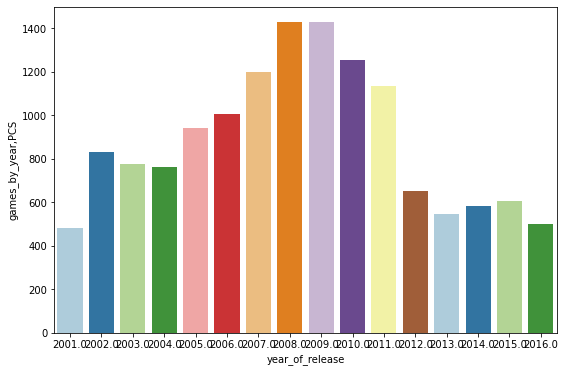

In [29]:
games_by_years_new = games_by_years.query('year_of_release>2000')
plt.figure(figsize=(9,6))
sns.barplot(data=games_by_years_new,x='year_of_release', y='games_by_year,PCS', palette="Paired")

Вывод Значительный рост в выпуске игр начался с 1995 года. Пик выпуска пришелся на 2008-2009 года. До 2013 года шел спад. Затем второй пик на 2015 году, а в 2016 спад начался. Значения до 1995 года нам однозначно не нужны. Мы учучаем данные 2016 года для планирования кампании 2017 года. Возьмем период с 2000 года.

### Расчет продаж по платформам

Посмотрим на продажи по платформам.•	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
sales_by_platform = games_stat.groupby('platform')['total_sales'].agg(['sum']).reset_index()
sales_by_platform.head()

platform     sum
0     2600   96.98
1      3DO    0.10
2      3DS  259.00
3       DC   15.95
4       DS  806.12

Минимум по продажам sales_by_platform 0.03
Максимум по продажам sales_by_platform 1255.7699999999925


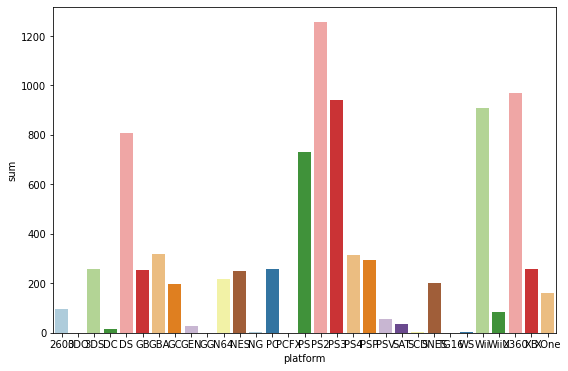

In [31]:
plt.figure(figsize=(9,6))
sns.barplot(data=sales_by_platform, x='platform', y='sum', palette="Paired")
print(f'Минимум по продажам sales_by_platform {sales_by_platform["sum"].min()}')
print(f'Максимум по продажам sales_by_platform {sales_by_platform["sum"].max()}')

Попробуем отбросить часть данных. Так как у нас большой пик по частоте у 0 и около него. Тогда как эти случаи нам совсем не интересны. 

In [32]:
sales_by_platform.query('sum>160')['sum'].sum()/sales_by_platform['sum'].sum()

0.9466526950205816

Построим график с учетом отброшенных значений.

<AxesSubplot:xlabel='platform', ylabel='sum'>

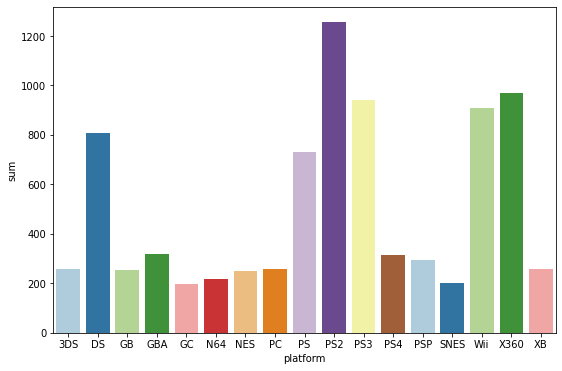

In [33]:
plt.figure(figsize=(9,6))
sns.barplot(data=sales_by_platform.query('sum>160 and sum<1300'), x='platform', y='sum', palette="Paired")

Мы видим 1 четкий пик и спад значений по краям от него. Распределение стремится к нормальному.

Посмотрим на наши данные по платформам. Оставим в данных те платформы, продажи в которых стставили более 160 млн копий.

In [34]:
sales_by_platform = sales_by_platform.query('sum > 160')

Посмотрим на кол-во платформ оставшихя после фильтрации.

In [35]:
len(sales_by_platform.sort_values(by='sum', ascending=False))

17

In [36]:
sales_by_platform.sort_values(by='sum', ascending=False)

platform      sum
16      PS2  1255.77
28     X360   971.42
17      PS3   939.65
26      Wii   907.51
4        DS   806.12
15       PS   730.86
6       GBA   317.85
18      PS4   314.14
19      PSP   294.05
13       PC   259.52
2       3DS   259.00
29       XB   257.74
5        GB   255.46
11      NES   251.05
10      N64   218.68
23     SNES   200.04
7        GC   198.93

Выберем платформы с наибольшими суммарными продажами. К ним относятся: PS2,X360,PS3,Wii,DS,PS. Изучим продажи по годам для каждой из платформ. Будем работать с games_stat.

In [37]:
games_stat.head()

name platform  year_of_release  total_sales
0                Wii Sports      Wii           2006.0        82.54
1         Super Mario Bros.      NES           1985.0        40.24
2            Mario Kart Wii      Wii           2008.0        35.52
3         Wii Sports Resort      Wii           2009.0        32.77
4  Pokemon Red/Pokemon Blue       GB           1996.0        31.38

Посмотрим на продажи внутри самых популярных платформ. КОгда появлялись, когда исчезали.

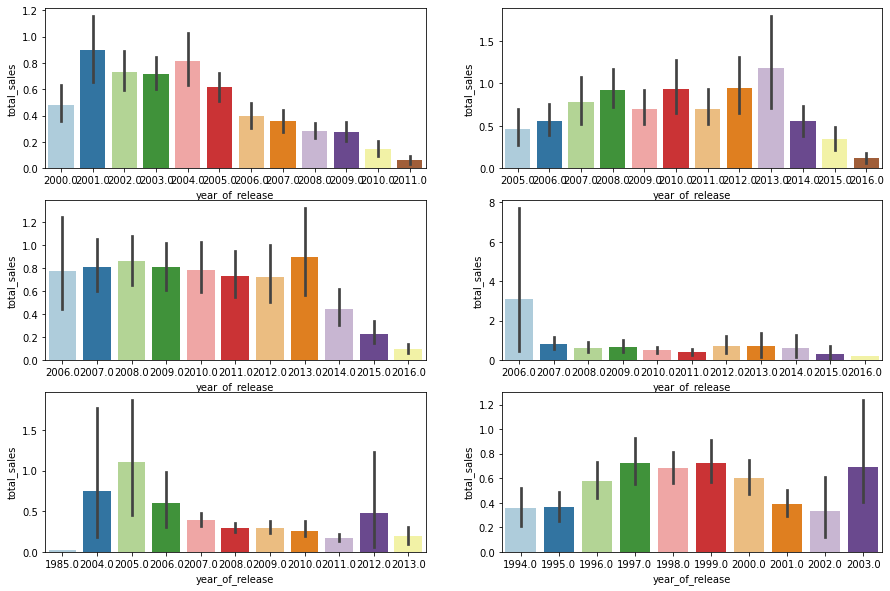

In [38]:
platforms=['PS2','X360','PS3','Wii','DS','PS']
i=-1
fig, ax = plt.subplots(3,2, figsize=(15,10))
for plat in platforms:
    i += 1
    if i<2:
         sns.barplot(data=games_stat.query('platform in @plat'), x='year_of_release', y='total_sales', palette="Paired", ax = ax[0][i])
    elif i<4:
         sns.barplot(data=games_stat.query('platform in @plat'), x='year_of_release', y='total_sales', palette="Paired", ax = ax[1][i-2])
    else:
         sns.barplot(data=games_stat.query('platform in @plat'), x='year_of_release', y='total_sales', palette="Paired", ax = ax[2][i-4])

**Вывод:** По полученным графикам видно, что 6-10 лет общий срок роста и исчезновения большинства платформ. PS2(2000-2009), X360(2005-2015), PS3(2006-2015), Wii(2006- 2012), DS(2004-2012), PS(1994-2002).

### Исследование актуального периода

Судя по данным, полученным в ходе расчета игр по годам, интересующий нас период с 2000 года. Однако, продажи по платформам сужают период до 6-10 лет. Данные за 2016 год неполные. Возьмем период 4 года. Т.е. с 2012 по 2016 год для оценки прогноза на 2017 год, чтобы понять тенденцию продаж на платформе. <br> Сузим выборку до данных за указанны период. Проверим значения в столбце year_of_release для уверенности, что все сделано верно.

In [39]:
games_actual = games.query('year_of_release>2012')
games_actual['year_of_release'].value_counts()

2015.0    606
2014.0    581
2013.0    544
2016.0    502
Name: year_of_release, dtype: int64

### Потенциально прибыльные платформы, исследование в актуальном периоде

Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [40]:
actual_stat = games_actual[['name','platform','year_of_release','total_sales']] 
sales_by_platform_act = games_actual.groupby('platform')['total_sales'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
sales_by_platform_act.columns = ['platform', 'total_sales']

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

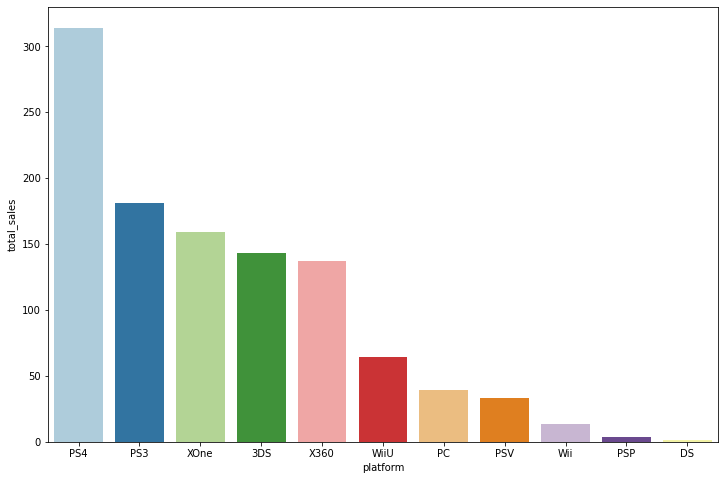

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(data=sales_by_platform_act, x='platform', y='total_sales', palette="Paired")


Выберем для исследования несколько платформ с максимальными проадажми: PS4, PS3, XOne, 3DS, X360, WiiU, PC, PCV.<br> Посморим на их продажи во временном разрезе.

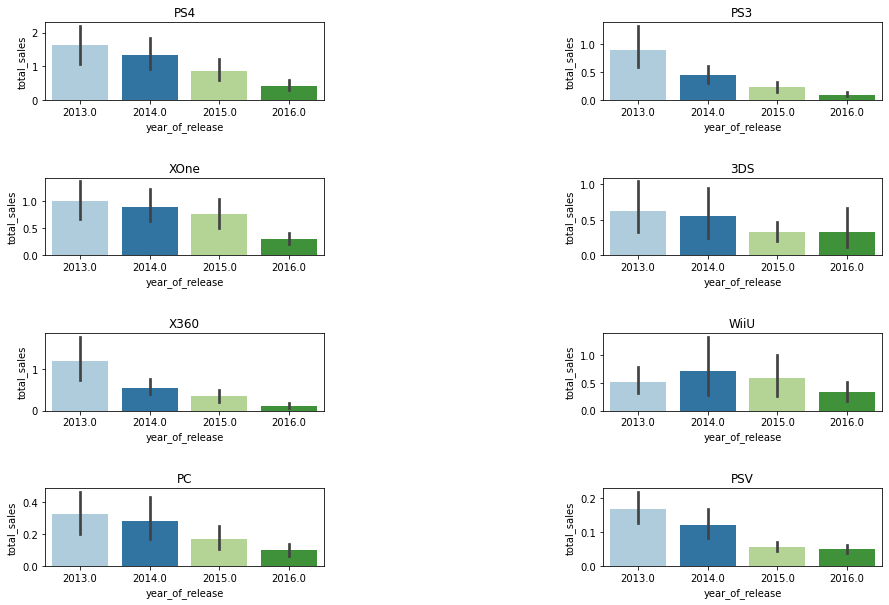

In [42]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV']
i=-1
fig, ax = plt.subplots(4,2, figsize=(15,10))
plt.subplots_adjust(wspace=1, hspace=1)
for plat in platforms:
    i += 1
    if i<2:
         sns.barplot(data=actual_stat.query('platform in @plat'), x='year_of_release', y='total_sales', label = plat, palette="Paired", ax = ax[0][i])               
         ax[0][i].set_title(plat)   
    elif i<4:
         sns.barplot(data=actual_stat.query('platform in @plat'), x='year_of_release', y='total_sales', label = plat,palette="Paired", ax = ax[1][i-2])
         ax[1][i-2].set_title(plat) 
    elif i<6:
         sns.barplot(data=actual_stat.query('platform in @plat'), x='year_of_release', y='total_sales', label = plat,palette="Paired", ax = ax[2][i-4])    
         ax[2][i-4].set_title(plat)   
    else:
         sns.barplot(data=actual_stat.query('platform in @plat'), x='year_of_release', y='total_sales', label = plat, palette="Paired", ax = ax[3][i-6])    
         ax[3][i-6].set_title(plat)    

**Вывод** Получается, что по лидирую по платформам PS3, X360, PS4, 3DS. На всех платформах идет фаза спада. Где то продажи совсем сошли на нет, а где-то снижение не столь значительно. Наиболее перспективными получаются: PS4 c продажами на сумму около 70 млн проданных копий. XOne около 26 млн проданных копий, 3DS - 15 млн проданных копий, PC 5 млн копий, WiiU - около 5 млн, PSV около 4 млн.

### График "ящик с усами" по глобальным продажам игр

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Выберем самые популярные. 

График будем стоить по данным за актуальный период это выборка actual_stat.

In [43]:
actual_stat.head()

name platform  year_of_release  total_sales
16         Grand Theft Auto V      PS3           2013.0        21.05
23         Grand Theft Auto V     X360           2013.0        16.27
31  Call of Duty: Black Ops 3      PS4           2015.0        14.63
33        Pokemon X/Pokemon Y      3DS           2013.0        14.60
42         Grand Theft Auto V      PS4           2014.0        12.62

In [44]:
actual_stat['year_of_release'].value_counts()

2015.0    606
2014.0    581
2013.0    544
2016.0    502
Name: year_of_release, dtype: int64

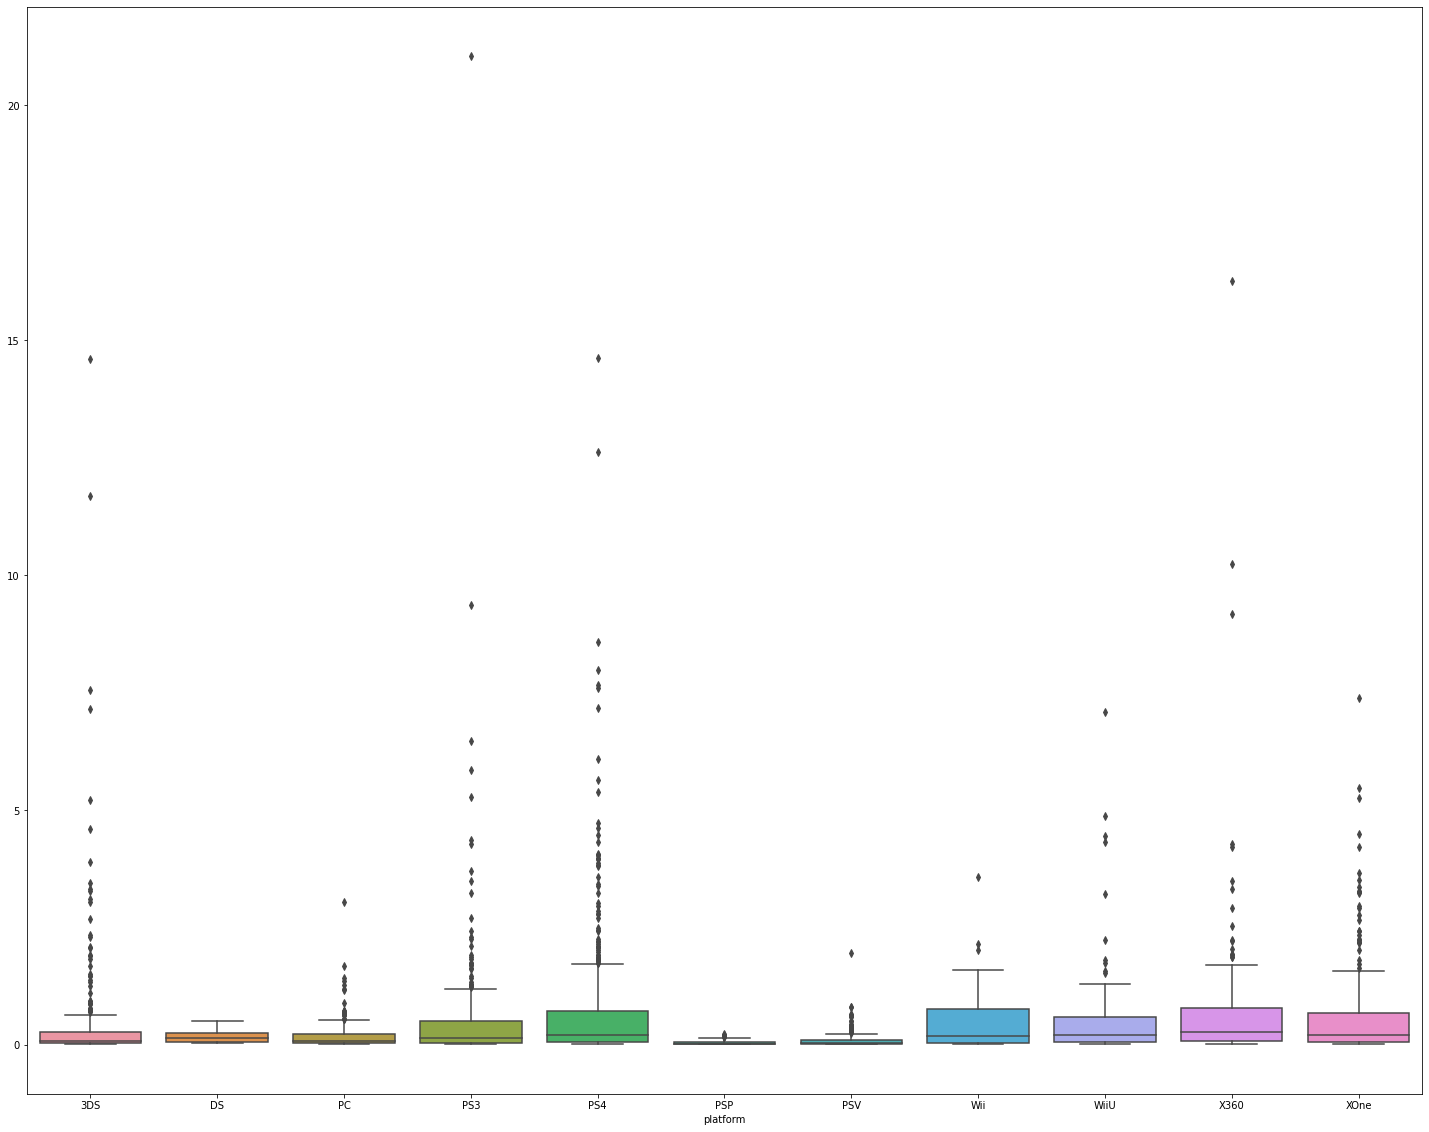

In [45]:
df = pd.pivot_table(actual_stat, columns='platform',values ='total_sales' , index='name')
plt.figure(figsize=(25,20))
boxplot = sns.boxplot(data = df)

Смасштабируем график для детального рассмотрения медиан и квартилей.Сузим интервал до 2 млн копий.

(0.0, 2.0)

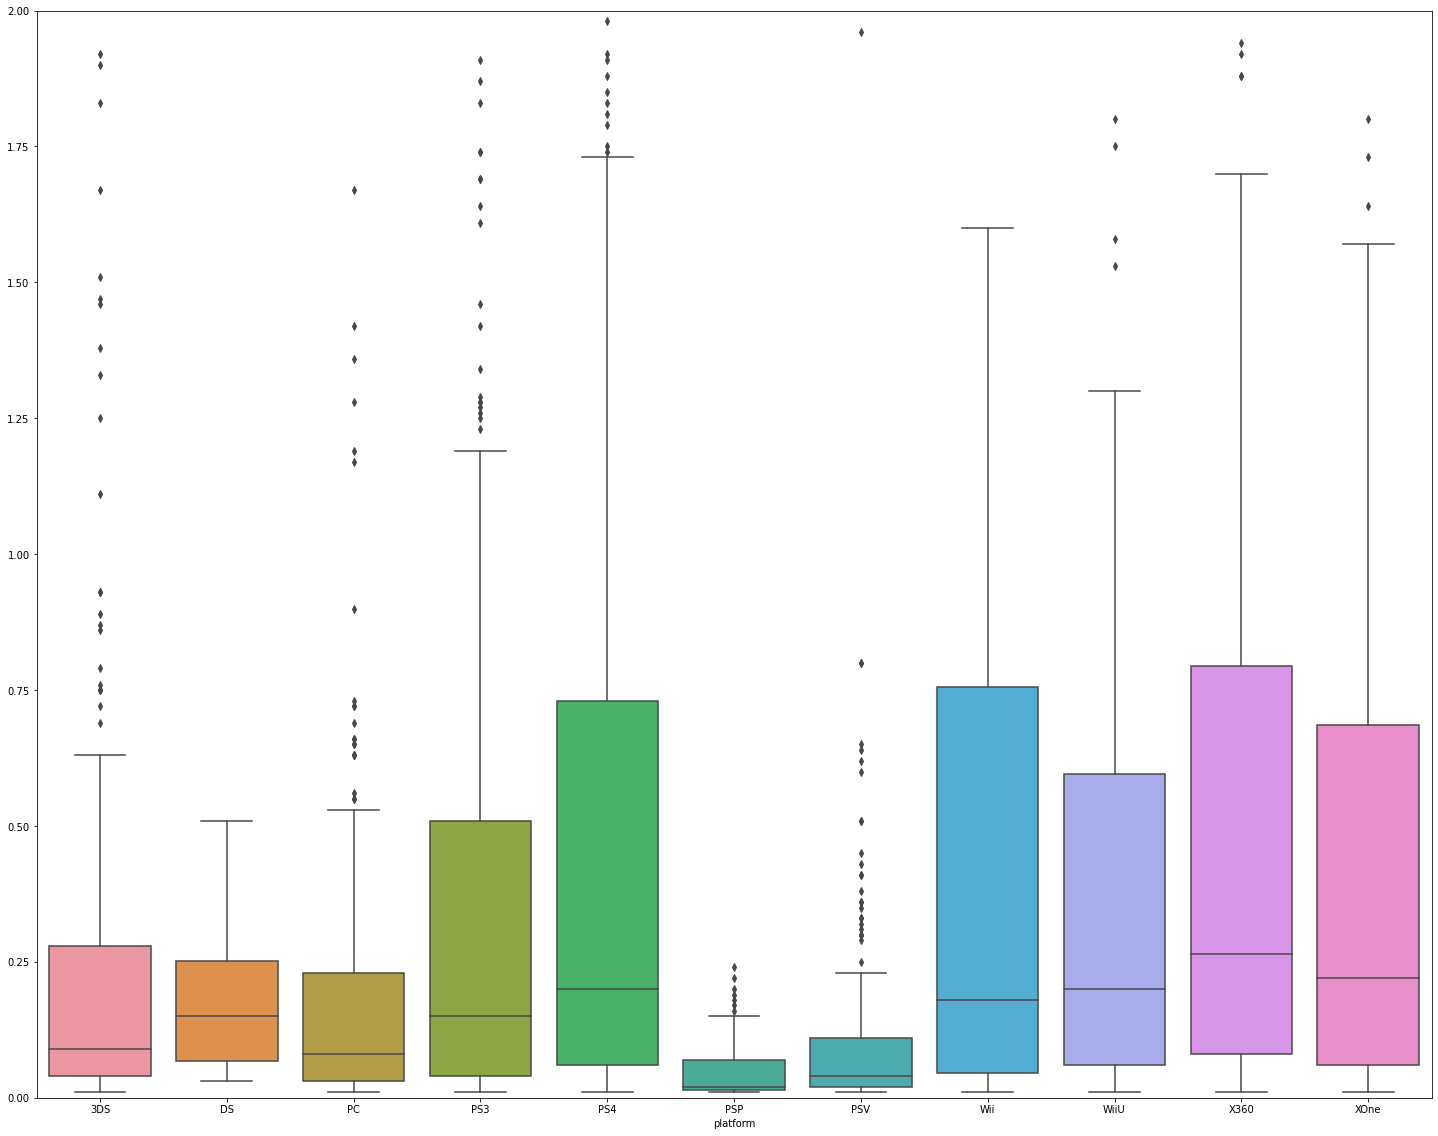

In [46]:
plt.figure(figsize=(25,20))
boxplot = sns.boxplot(data = df)
boxplot.set_ylim([0, 2])  

**Вывод** Медианные значения продаж платформ XOne,X360 и PS4 выше чем у остальных платформ. Это уверенная тройка лидеров в актуальном периоде. Схожи как медианные значения, так и уровни 1 и 3го квартилей.
<br>Следующая группа, схожая по уровню медиан и квартилей это платформы DS, PS3,Wii, WiiU.
<br>В хвосте остаются 3DS, PS, PCSV и минимум за PSP.

### Влияние оценок пользователей и критиков на продажи платформ 

Посмотрим, как влияют на продажи отзывы пользователей user_score и критиков critic_score. Смотреть влияние будем для наиболее популярных платформ:PS4, PS3, XOne, X360, WiiU, Wii, DS.

Работаем с данными за актуальный период в выборке games_actual.

In [47]:
games_score = games_actual[['total_sales','user_score','critic_score','platform']]

Посчитаем коррекляцию для каждой из платформ.

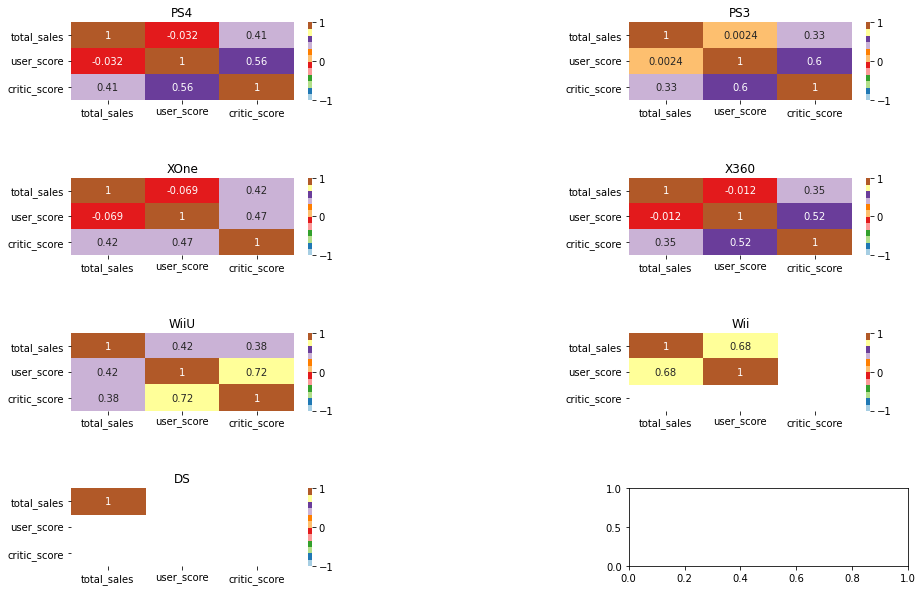

In [48]:
platforms = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii', 'DS']
i=-1
fig, ax = plt.subplots(4,2, figsize=(15,10))

plt.subplots_adjust(wspace=1, hspace=1)
for plat in platforms:
    platfo = games_score.query('platform == @plat')
    i += 1    
    if i<2:
        heatmap=sns.heatmap(platfo.corr(),vmin=-1, vmax=1, annot=True, ax = ax[0][i],cmap='Paired')
        heatmap.set_title(plat)  
    elif i<4:
        heatmap = sns.heatmap(platfo.corr(),vmin=-1, vmax=1, annot=True, cmap='Paired', ax = ax[1][i-2])
        heatmap.set_title(plat)
    elif i<6:
        heatmap = sns.heatmap(platfo.corr(),vmin=-1, vmax=1, annot=True,cmap='Paired', ax = ax[2][i-4])
        heatmap.set_title(plat)   
    else:
        heatmap = sns.heatmap(platfo.corr(),vmin=-1, vmax=1, annot=True,cmap='Paired', ax = ax[3][i-6])
        heatmap.set_title(plat)  

По платформе Wii нет данных по оценкам критиков. А по платформе DS нет ни оценко критиков, ни оценок пользователей в актуальном периоде. Обе платформы японские, производства Nintendo. Возможно, именно  этим связаны данные пробелы в данных.

Построим диаграммы для платформ. По Wii и DS данных нет, по ним не строим диаграммы.

PS4


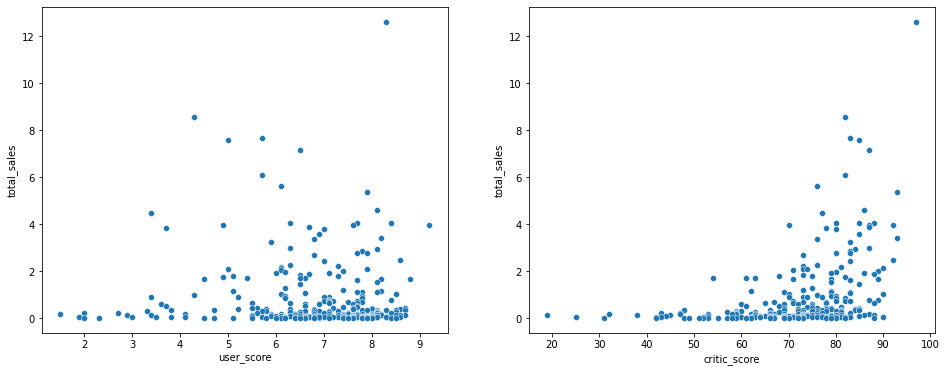

<Figure size 2520x2520 with 0 Axes>

PS3


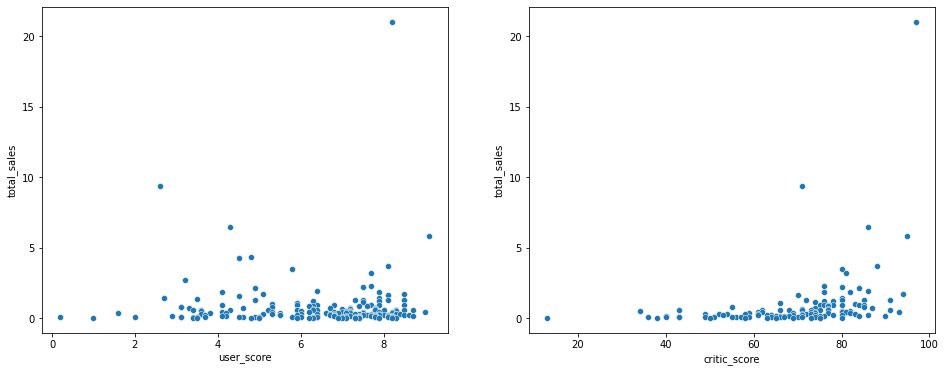

<Figure size 2520x2520 with 0 Axes>

XOne


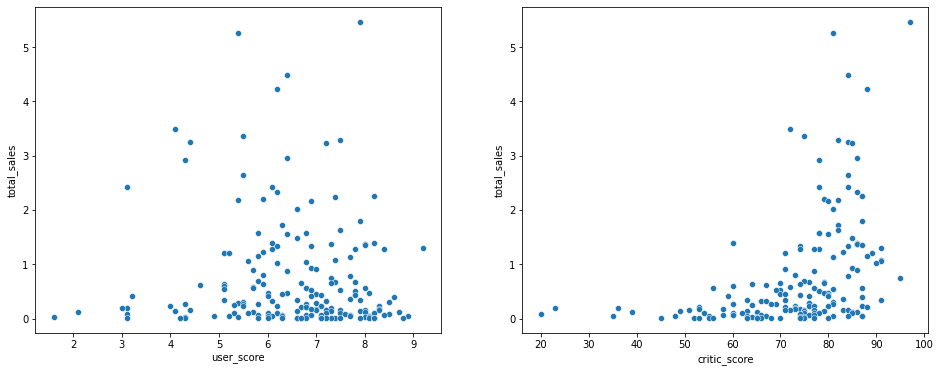

<Figure size 2520x2520 with 0 Axes>

X360


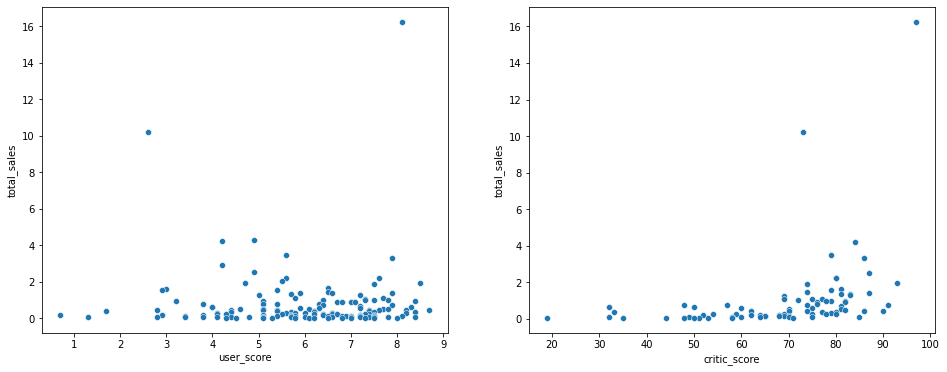

<Figure size 2520x2520 with 0 Axes>

WiiU


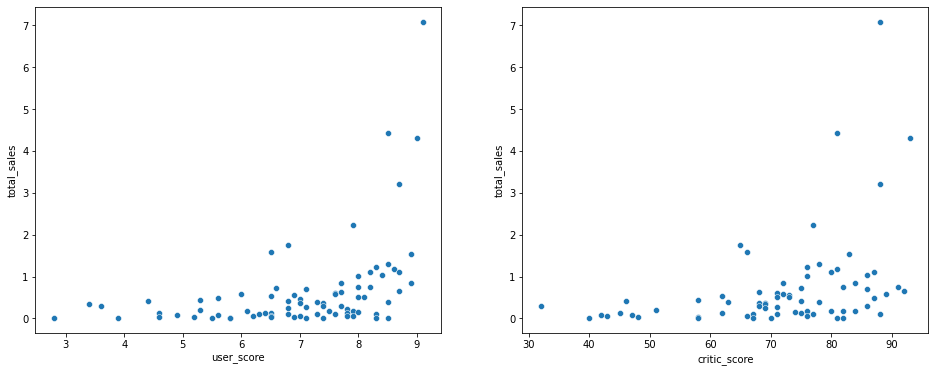

<Figure size 2520x2520 with 0 Axes>

In [49]:
platforms = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU']
for plat in platforms:
    print(plat)
    platfo = games_score.query('platform == @plat')
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
    scatter1=sns.scatterplot(data=platfo, x="user_score", y="total_sales",palette='Paired', ax=ax1)
    scatter2=sns.scatterplot(data=platfo, x="critic_score", y="total_sales",palette='Paired',ax=ax2) 
    plt.figure(figsize=(35,35))
    plt.show()
    fig.tight_layout()

**Вывод по корреляции оценок критиков с продажами на платформах:**  Корреляции между оценками пользователей и продажами, а также оценками критиков и продажами практически нет. Характер диаграмм говорит о том, что большинство оценок выше середины шкалы(больше 5 для пользователей и выше 50 для критиков).<br> Только по платформе WiiU коэффициенты корреляции между продажами и оценками пользователей и критиков 0.42 и 0.38. Однако, одназначно о зависимости говорить не приходится, значение далеко от 1.<br> Получается, что продажи сильнее коррелируют с оценками критиков, нежели чем с оценками пользователей. Хотя, уровень зависимости одназначно низкий. В некоторых случаях ее скорее нет.
<br>Корреляция между user_score и critical_score 0.47-0.72. Она есть, но в некоторых случаях(XOne, X360) скорее ближе к 0,5 чем к 1. Наиболее сильная зависимость в оценках по платформе 0.72 опять же для WiiU.

### Жанры игр

Посмотрим на общее распределение игр по жанрам.

In [50]:
games_genre = games_actual.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).reset_index()
games_genre.sort_values(by='total_sales',ascending=False)

genre  name  total_sales
0         Action   766       321.87
8        Shooter   187       232.98
10        Sports   214       150.65
7   Role-Playing   292       145.89
3           Misc   155        62.82
4       Platform    74        42.63
6         Racing    85        39.89
2       Fighting    80        35.31
1      Adventure   245        23.64
9     Simulation    62        21.76
11      Strategy    56        10.08
5         Puzzle    17         3.17

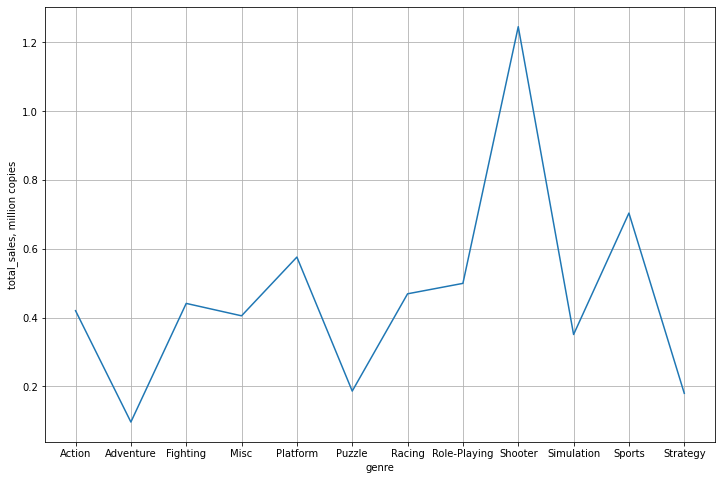

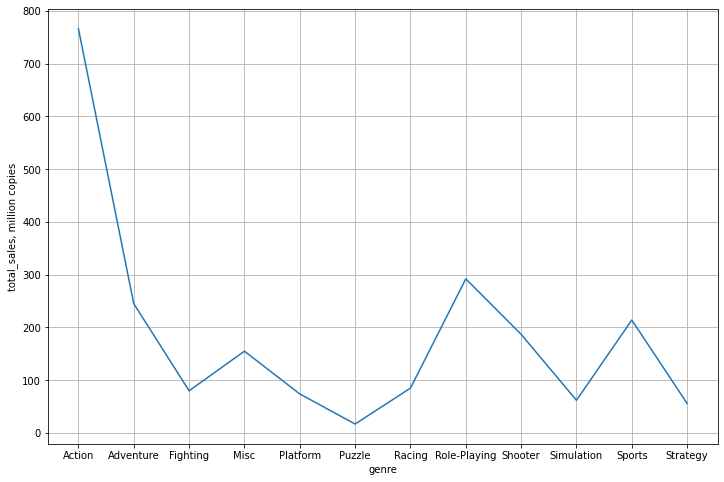

In [89]:
plt.figure(figsize=(12,8))
sns.lineplot(data=games_genre, x="genre", y="total_sales")
plt.grid()
plt.ylabel('total_sales, million copies')
plt.show()
plt.figure(figsize=(12,8))
sns.lineplot(data=games_genre, x="genre", y="name")
plt.grid()
plt.ylabel('total_sales, million copies')
plt.show()


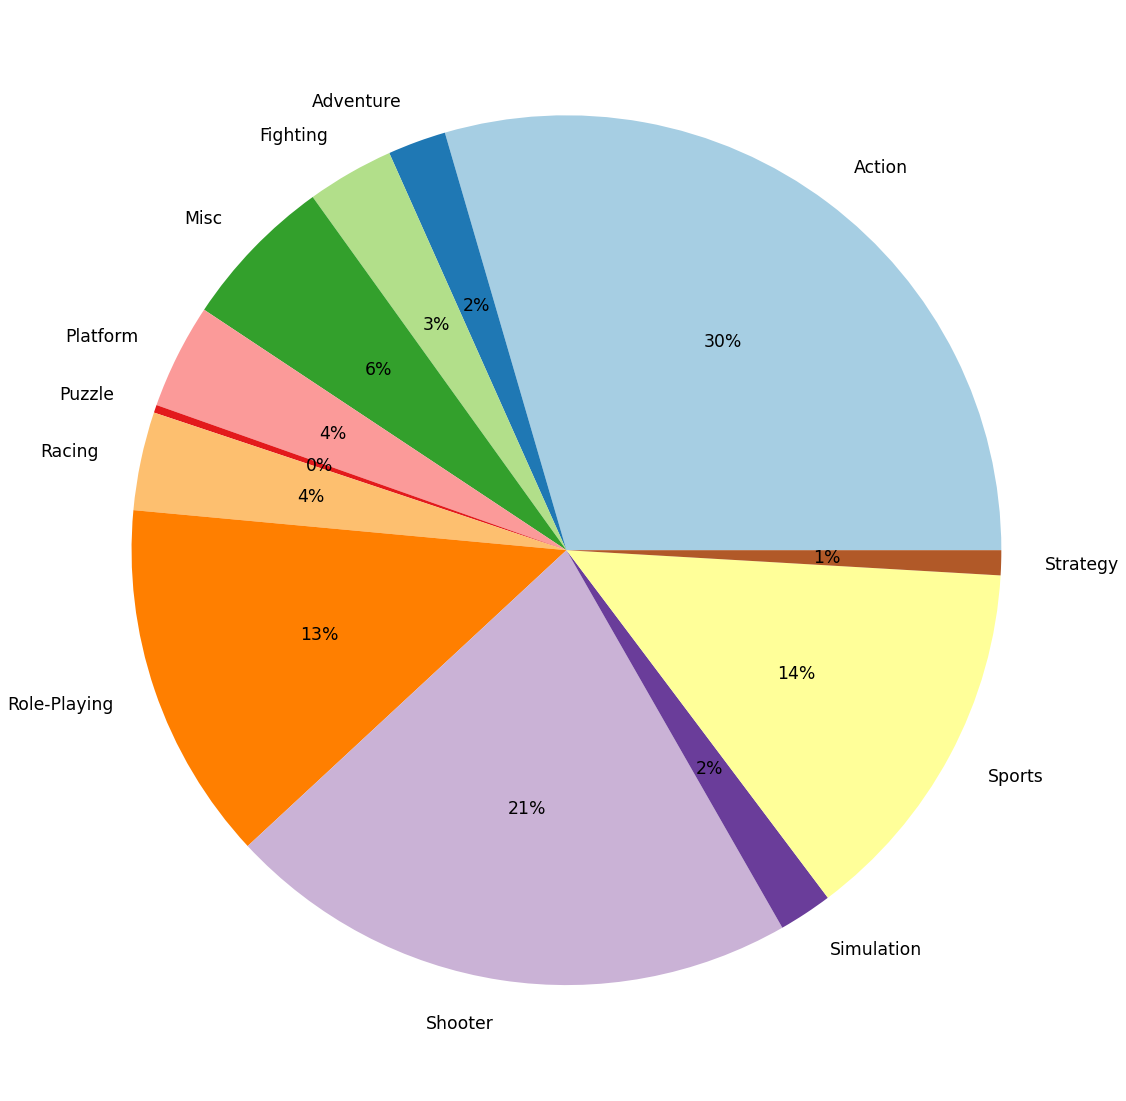

In [52]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(20,20))
plot=plt.pie(games_genre['total_sales'], labels = games_genre['genre'], colors = colors, autopct='%.0f%%',textprops={'size': 'xx-large'})
plt.show()

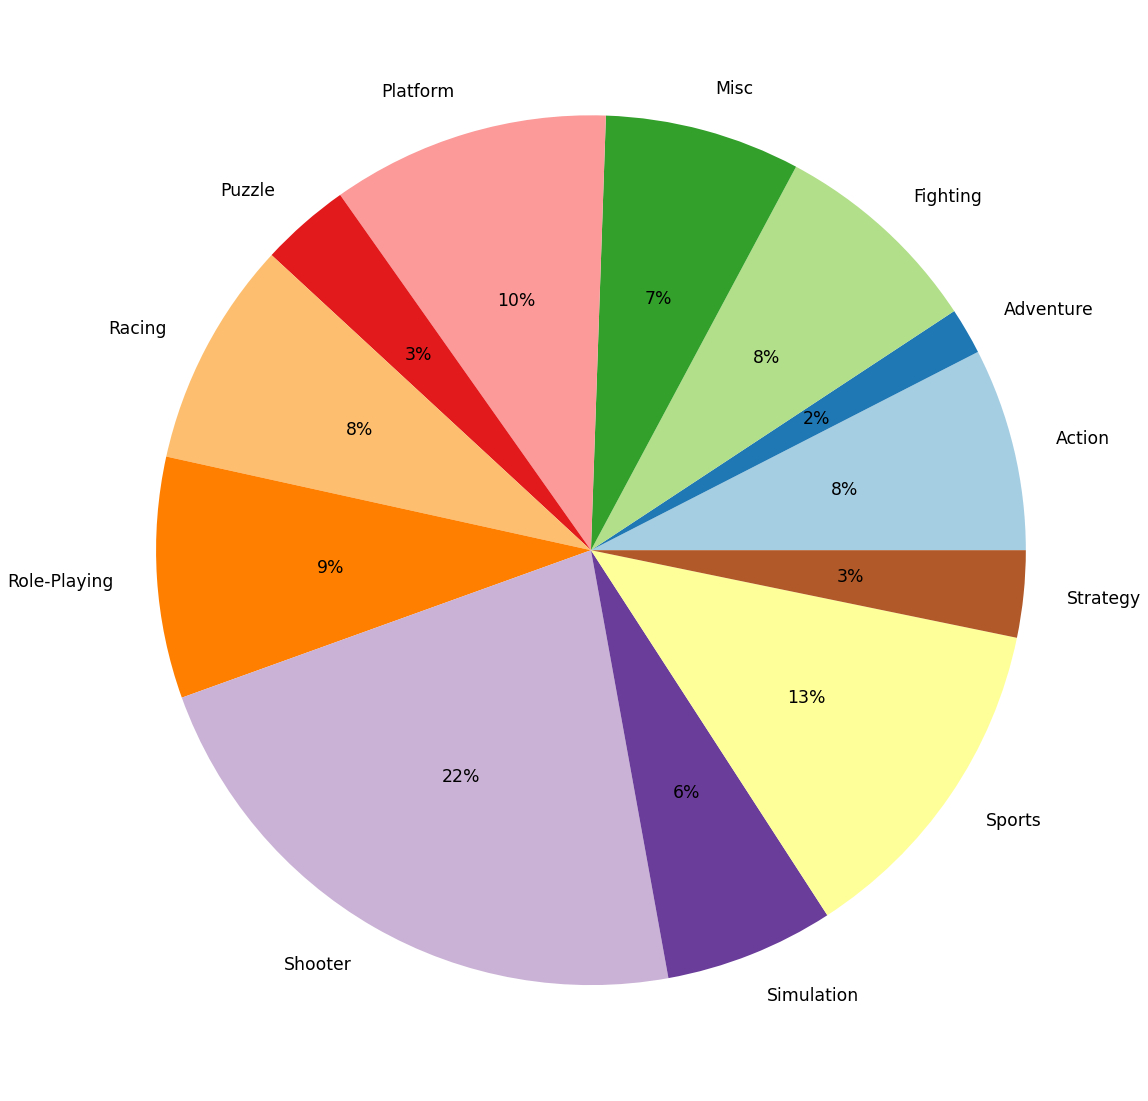

In [71]:
games_genre_mean = games_actual.groupby('genre').agg({'name': 'count', 'total_sales': 'mean'}).reset_index()
colors = sns.color_palette("Paired")
plt.figure(figsize=(20,20))
plot=plt.pie(games_genre_mean['total_sales'], labels = games_genre['genre'], colors = colors, autopct='%.0f%%',textprops={'size': 'xx-large'})
plt.show()

**Вывод** Самыми прибыльными являются игры в жанрах Action, Sports и Shooter. Выделяются жанры с высокими и низкими продажами. К высоким нужно отнести лидеров Sports,Platform и Shooter. К среднему сегменту продаж можно отнести Role-Playing, Action, Fighting, Simulation, Misc и Racing. К сегменту низких продаж отнесем Simulation, Puzzle и Adventure.	

## Портрет пользователя каждого региона

### ТОП-5 популярных платформ

Будем определять для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Посмотрим на различия в долях продаж.

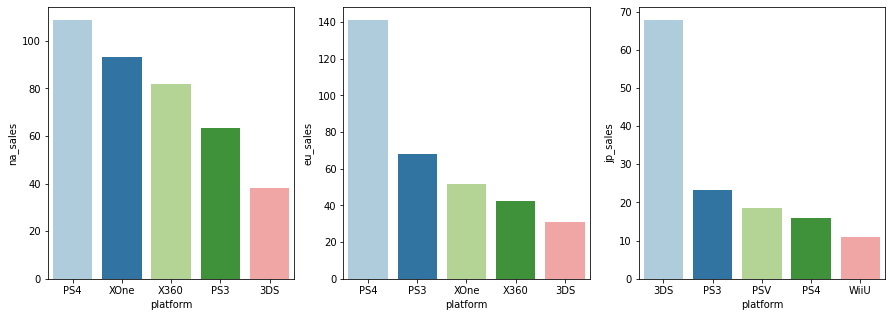

In [54]:
regions = ['na_sales','eu_sales','jp_sales']
i=-1
fig, ax = plt.subplots(1,3, figsize=(15,5))
for reg in regions:
    i += 1
    games_reg = games_actual[games[reg]>0]
    games_reg = games_reg.groupby('platform').agg({'name': 'count', reg: 'sum'}).sort_values(by=reg,ascending=False).reset_index()[0:5]    
    sns.barplot(data=games_reg, y=reg,x='platform', palette="Paired",ax = ax[i])

**Вывод по платформам** Топ-5 самых популярных платформ значительно отличается.
<br>1. PS3 и PS4 популярны во всех регионах. В Америке и Европе PS4 на первом месте. PS3 на 4ом и 2ом местах. А в Японии PS3 опережает PS4. 2ое место против 4ого.
<br>2. XOne и X360 популярны в Европе и Америке. В Японии в ТОП-5 не входят.
<br>3. 3DS первая в Японии и лишь пятая в Америке и в Европе.
<br>4. В Японии 3 платформы, входящие в ТОП-5(3DS, PSV, WiiU) не входят в 5ки.

### ТОП-5 популярных жанров

Будем определять для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Посмотрим, есть ли разница.

In [55]:
regions = ['na_sales','eu_sales','jp_sales']
i=-1
fig = make_subplots(rows=1, cols=3,specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])
for reg in regions:
    i += 1
    games_reg = games_actual[games[reg]>0]
    games_reg = games_reg.groupby('genre').agg({'name': 'count', reg: 'sum'}).sort_values(by=reg,ascending=False).reset_index()
    fig.add_trace(go.Pie(labels=games_reg['genre'],title=reg, values=games_reg[reg], name=reg), 1, i+1)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

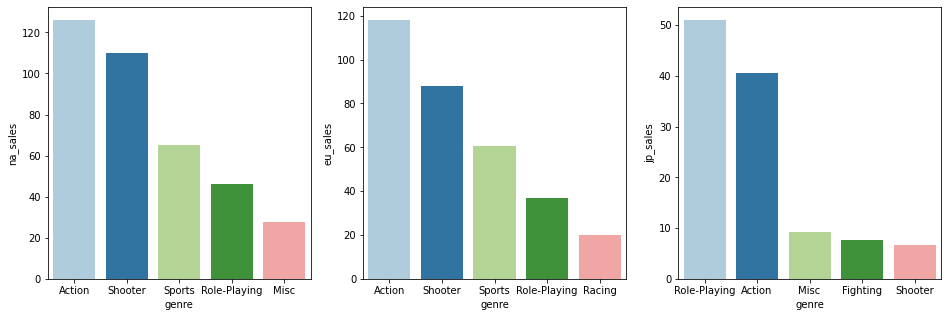

In [56]:
regions = ['na_sales','eu_sales','jp_sales']
i=-1
fig, ax = plt.subplots(1,3, figsize=(16,5))
for reg in regions:
    i += 1
    games_reg = games_actual[games[reg]>0]
    games_reg = games_reg.groupby('genre').agg({'name': 'count', reg: 'sum'}).sort_values(by=reg,ascending=False).reset_index()[0:5]    
    sns.barplot(data=games_reg, y=reg,x='genre', palette="Paired",ax = ax[i])

**Вывод по жанрам**  Отличия по жанрам не такие существенные. <br>1. 2 из 5 жанров(Action и Shooter) попадают в 5 во всех регионах. 
<br> 2. Интересы американских и европейских игроков очень схожи. Они любят жанры Action, Shooter, Sports, Role-Playing. В Еропе также интересны Racing, а в Америке Misc.
<br> 3. В Японии наиболее доходными являются Role-Playing. Жанр Sports, популярный в Америке и Европе, не попадает в ТОП-5 японцев. Только в Японии в ТОП-5 входит Fighting.

### Рейтинг ESRB 

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

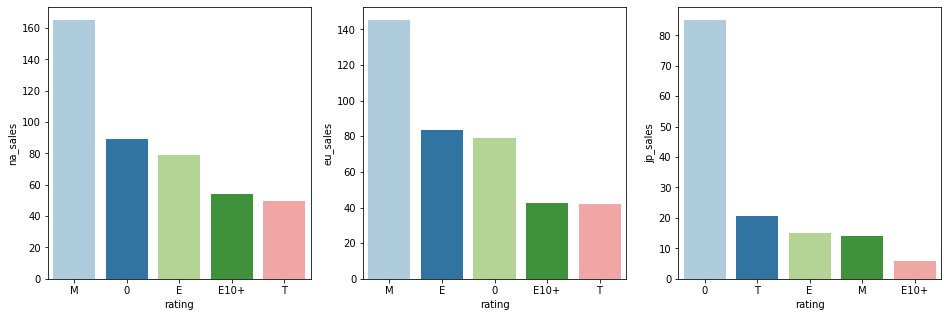

In [57]:
regions = ['na_sales','eu_sales','jp_sales']
i=-1
fig, ax = plt.subplots(1,3, figsize=(16,5))
for reg in regions:
    i += 1
    games_reg = games_actual[games[reg]>0]
    games_reg = games_reg.groupby('rating').agg({'name': 'count', reg: 'sum'}).sort_values(by=reg,ascending=False).reset_index()[0:5]    
    sns.barplot(data=games_reg, y=reg,x='rating', palette="Paired",ax = ax[i])

**Вывод по рейтингу ESRB** 
<br>E - («Everyone») — «Для всех»: С
<br>M - («Mature») — «От 17 лет
<br>T - («Teen») — «Подросткам»
<br>E10+ - («Everyone 10 and older») - «Для всех старше 10 лет» 
<br>KA -  («Kids to Adults»)— «Для детей и взрослых»
<br>AO -  («Adults Only 18+») — «Только для взрослых»
<br>Большая часть игр в Японии идут без индекса. Остальные категории T,E,M, E10+ примерно равны. В Европе и Америке ситуация другая, хотя, 0 значения также есть. Наиболее популярными ячляются категории M и Е. Остальны категории E10+ и T аналогичны. Вопрос в 0 значениях. Это не ошибка, а происходит из-за того, что маркировка игр проводится в США и Европе. А игры, популярные в этих странах с 0 индексом - игры Японии. Японцы предпочитают свои  игры, потому, 0-ых значений так много. 

**Вывод по портрету пользователя каждого региона** <br>NA и EU пользователи. В Америке наиболее популярные платформы PS4, PS3, X360, XOne, 3DS. <br>JP пользователи используют чаще всего 3DS, PS3, PSV, PS4, WiiU.
<br>По жанрам в рекламе стратегия более схожа, следует сосредоточиться на наиболее доходных: Action, Shooter и Role_playing. 
<br> Категории пользователей рейтинга ESRB схожи для Европы и Америкея. В Японии в первую очередь популярны игры без индекса. Во всех регионах в ТОПе: E(для всех), T(подростки), M(от 17 лет) и Е10+(для всех старше 10 лет).

## Проверка гипотез

. Проверьте гипотезы
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
•	Как вы сформулировали нулевую и альтернативную гипотезы;
•	Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы нужно сформулировать нулевую Н0 и альтернативную Н1. <br> В нулевой гипотезе должно быть равенство. 

Н0:cредние пользовательские рейтинги платформ Xbox One и PC равны. <br> Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Сделаем выборки по Xbox One и PC. Так как у нас есть и NaN значения в user_score, выберем лишь те, что больше 0.

In [59]:
game_xbox = games_actual.query('(platform =="XOne") and (user_score>0)') 
game_PC = games_actual.query('(platform =="PC") and (user_score>0)') 
print(f'Размер выборки по XOne платформе {len(game_xbox)}')
print(f'Размер выборки по PC платформе {len(game_PC)}')

Размер выборки по XOne платформе 182
Размер выборки по PC платформе 155


Так как размеры выборок разные, то  equal_var будет = False. Метод будем использовать scipy.stats.ttest_ind так как выборки независимые.

In [60]:
alpha = .01
results = st.ttest_ind(
    game_xbox['user_score'], 
    game_PC['user_score'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе средние user_score XOne и PC**
<br> По полученному р-значению мы не отвергаем Н0. Получается, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.

### Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы нужно сформулировать нулевую Н0 и альтернативную Н1. <br> В нулевой гипотезе должно быть равенство. 

Н0:cредние пользовательские рейтинги жанров Action и Sports равны. <br> Н1: Средние пользовательские рейтинги жанров Action и Sports не равны.

Сделаем выборки по Action и Sports. Так как у нас есть и NaN значения в user_score, выберем лишь те, что больше 0.

In [61]:
game_action = games_actual.query('(genre =="Action") and (user_score>0)') 
game_sports = games_actual.query('(genre =="Sports") and (user_score>0)') 
print(f'Размер выборки по Action платформе {len(game_action)}')
print(f'Размер выборки по Sports платформе {len(game_sports)}')

Размер выборки по Action платформе 389
Размер выборки по Sports платформе 160


Так как размеры выборок разные, то  equal_var будет = False. Метод будем использовать scipy.stats.ttest_ind так как выборки независимые.

In [62]:
alpha = .01
results = st.ttest_ind(
    game_action['user_score'], 
    game_sports['user_score'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод по гипотезе средние user_score XOne и PC**
<br> По полученному р-значению отвергаем Н0. Получается, что гипотезу Н1 о том, что cредние пользовательские рейтинги жанров Action и Sports не равны не отвергается.

## Общий вывод

**Общий вывод**:

**Описание проекта:** У нас есть данные продаж компьютерных игр интернет-магазина «Стримчик» . В данных есть сведения о продажах игр, оценке пользователей и экспертов, жанрах и платформах.
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные до 2016 года. Мы планируем кампанию на 2017-й.
<br>
<br> **Этапы проекта:**
<br>Для анализа продаж компьютерных игр магазина "Стримчик" мы исследовали данные по продажам игр с 1980 по 2016 год.
<br>В данных были обнаружены ошибки в оформлении названий столбцов и формата данных.
<br>Данные были проверены на пропуски и дубликаты. Исследованы на аномалии.
<br>Провели расчеты: кол-ва выпущенных игр по годам, продаж отдельных платформ. Мы выбрали актуальный период для оценки кампании 2017 года. <br>Определились с потенциально прибыльными платформами. Изучили влияния оценок пользователей и критиков на продажи. <br>А также проанализировали популярные жанры игр и продажи по ним.
<br>Рассмотрели портрет пользователя каждого региона с оценкой популярных платформ и жанров. <br>Оценили продажи по рейтингу ESRB.
<br>Проверили гипотезы:cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эту гипотезу мы не отвергли.Получается, что гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC не равны не отвергается. <br>Вторая гипотеза:Средние пользовательские рейтинги жанров Action и Sports разные. Нулевую гипотезу о равенстве рейтингов отвергнуть не можем. Получается, что cредние пользовательские рейтинги жанров Action и Sports могут быть равны.
<br>
<br>**Получилось так:**
1. Наиболее перспективными получаются: PS4 ,XOne,3DS, WiiU, PС. 
2. Рекламные кампании по жанрам лучше делить по регионам. В Японии нужно сосредоточиться на жанре Role-Playing, тогда как в Европе и Америки его не следует рекламировать. А вот Shooter genre следует продвигать только по Европе и Америке. Общими жанрами будут Action, Sports и Misc.
3. По категориям ESRB лучше всего сосредоточиться на E, T, M, E10+.
